# 文本预处理

* 将文本作为字符串加载到内存中。

* 将字符串拆分为词元（如单词和字符）。

* 建立一个词汇表，将拆分的词元映射到数字索引。

* 将文本转换为数字索引序列，方便模型操作。

1. 读取数据集
2. 词元化
3. 词汇表：语料、\<unk\>、pad、bos、eos
4. 整合所有功能
5. 小结

In [1]:
import collections
import re

In [2]:
# 读取数据集
def read_time_machine():
    with open('./article.txt', 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]

lines = read_time_machine()
print(f'# text lines: {len(lines)}')
print(lines[0])
print(lines[10])

# text lines: 3221
the time machine by h g wells
twinkled and his usually pale face was flushed and animated the


In [3]:
s = 'the time machine by h g wells'
list(s)

['t',
 'h',
 'e',
 ' ',
 't',
 'i',
 'm',
 'e',
 ' ',
 'm',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'b',
 'y',
 ' ',
 'h',
 ' ',
 'g',
 ' ',
 'w',
 'e',
 'l',
 'l',
 's']

In [3]:
# 词元化.
def tokenize(lines, token='word'):
    """将文本行拆分成单词或者字符词元"""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('错误: 未知词元类型:' + token)
        
tokens = tokenize(lines, token='char')
for i in range(11):
    print(tokens[i])

['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
[]
[]
[]
[]
['i']
[]
[]
['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 't', 'r', 'a', 'v', 'e', 'l', 'l', 'e', 'r', ' ', 'f', 'o', 'r', ' ', 's', 'o', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', 'b', 'e', ' ', 'c', 'o', 'n', 'v', 'e', 'n', 'i', 'e', 'n', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'a', 'k', ' ', 'o', 'f', ' ', 'h', 'i', 'm']
['w', 'a', 's', ' ', 'e', 'x', 'p', 'o', 'u', 'n', 'd', 'i', 'n', 'g', ' ', 'a', ' ', 'r', 'e', 'c', 'o', 'n', 'd', 'i', 't', 'e', ' ', 'm', 'a', 't', 't', 'e', 'r', ' ', 't', 'o', ' ', 'u', 's', ' ', 'h', 'i', 's', ' ', 'g', 'r', 'e', 'y', ' ', 'e', 'y', 'e', 's', ' ', 's', 'h', 'o', 'n', 'e', ' ', 'a', 'n', 'd']
['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f

In [4]:
# 统计词元频率
def count_corpus(tokens):
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 把词元列表展平成使用词元填充的一个列表. 
        tokens = [token for line in tokens for token in line]
#         temp = []
#         for line in tokens:
#             for token in line:
#                 temp.append(token)
                
    return collections.Counter(tokens)

In [12]:
tokens

[['t',
  'h',
  'e',
  ' ',
  't',
  'i',
  'm',
  'e',
  ' ',
  'm',
  'a',
  'c',
  'h',
  'i',
  'n',
  'e',
  ' ',
  'b',
  'y',
  ' ',
  'h',
  ' ',
  'g',
  ' ',
  'w',
  'e',
  'l',
  'l',
  's'],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 [],
 ['t',
  'h',
  'e',
  ' ',
  't',
  'i',
  'm',
  'e',
  ' ',
  't',
  'r',
  'a',
  'v',
  'e',
  'l',
  'l',
  'e',
  'r',
  ' ',
  'f',
  'o',
  'r',
  ' ',
  's',
  'o',
  ' ',
  'i',
  't',
  ' ',
  'w',
  'i',
  'l',
  'l',
  ' ',
  'b',
  'e',
  ' ',
  'c',
  'o',
  'n',
  'v',
  'e',
  'n',
  'i',
  'e',
  'n',
  't',
  ' ',
  't',
  'o',
  ' ',
  's',
  'p',
  'e',
  'a',
  'k',
  ' ',
  'o',
  'f',
  ' ',
  'h',
  'i',
  'm'],
 ['w',
  'a',
  's',
  ' ',
  'e',
  'x',
  'p',
  'o',
  'u',
  'n',
  'd',
  'i',
  'n',
  'g',
  ' ',
  'a',
  ' ',
  'r',
  'e',
  'c',
  'o',
  'n',
  'd',
  'i',
  't',
  'e',
  ' ',
  'm',
  'a',
  't',
  't',
  'e',
  'r',
  ' ',
  't',
  'o',
  ' ',
  'u',
  's',
  ' ',
  'h',
  'i',
  's',
  ' ',
  'g',
 

In [48]:
len(count_corpus(tokens))

4579

In [51]:
count_corpus(tokens).items()

dict_items([('the', 2261), ('time', 200), ('machine', 85), ('by', 103), ('h', 1), ('g', 1), ('wells', 9), ('i', 1267), ('traveller', 61), ('for', 221), ('so', 112), ('it', 437), ('will', 37), ('be', 93), ('convenient', 5), ('to', 695), ('speak', 6), ('of', 1155), ('him', 40), ('was', 552), ('expounding', 2), ('a', 816), ('recondite', 1), ('matter', 6), ('us', 35), ('his', 129), ('grey', 11), ('eyes', 35), ('shone', 8), ('and', 1245), ('twinkled', 1), ('usually', 3), ('pale', 10), ('face', 38), ('flushed', 2), ('animated', 3), ('fire', 30), ('burned', 6), ('brightly', 4), ('soft', 16), ('radiance', 1), ('incandescent', 1), ('lights', 1), ('in', 541), ('lilies', 1), ('silver', 6), ('caught', 10), ('bubbles', 1), ('that', 443), ('flashed', 4), ('passed', 13), ('our', 57), ('glasses', 1), ('chairs', 2), ('being', 14), ('patents', 1), ('embraced', 1), ('caressed', 2), ('rather', 18), ('than', 34), ('submitted', 1), ('sat', 22), ('upon', 113), ('there', 127), ('luxurious', 1), ('after', 37),

In [38]:
# python自带了排序方法
sorted(count_corpus(tokens).items(), key=lambda x: x[1], reverse=True)

[(' ', 29927),
 ('e', 17838),
 ('t', 13515),
 ('a', 11704),
 ('i', 10138),
 ('n', 9917),
 ('o', 9758),
 ('s', 8486),
 ('h', 8257),
 ('r', 7674),
 ('d', 6337),
 ('l', 6146),
 ('m', 4043),
 ('u', 3805),
 ('c', 3424),
 ('f', 3354),
 ('w', 3225),
 ('g', 3075),
 ('y', 2679),
 ('p', 2427),
 ('b', 1897),
 ('v', 1295),
 ('k', 1087),
 ('x', 236),
 ('z', 144),
 ('j', 97),
 ('q', 95)]

In [19]:
count_corpus(tokens).items()

dict_items([('t', 13515), ('h', 8257), ('e', 17838), (' ', 29927), ('i', 10138), ('m', 4043), ('a', 11704), ('c', 3424), ('n', 9917), ('b', 1897), ('y', 2679), ('g', 3075), ('w', 3225), ('l', 6146), ('s', 8486), ('r', 7674), ('v', 1295), ('f', 3354), ('o', 9758), ('p', 2427), ('k', 1087), ('x', 236), ('u', 3805), ('d', 6337), ('z', 144), ('j', 97), ('q', 95)])

In [5]:


# 构建词汇表
class Vocab:
    """文本词汇表"""
    def __init__(self, tokens=None, min_freq=0, reserved_token=None):
        if tokens is None:
            tokens = []
        if reserved_token is None:
            reserved_token = []
            
        # 按照出现频率进行排序
        counter = count_corpus(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=True)
        # 未知词元索引为0
        self.unk, uniq_tokens = 0, ['<unk>'] + reserved_token
        uniq_tokens += [token for token, freq in self.token_freqs if freq >= min_freq and token not in uniq_tokens]
        self.idx_to_token, self.token_to_idx = [], dict()
        
        for token in uniq_tokens:
            self.idx_to_token.append(token)
            self.token_to_idx[token] = len(self.idx_to_token) - 1
            
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

In [23]:
vocab = Vocab(tokens)


In [24]:
len(vocab)

28

In [26]:
vocab.token_to_idx

{'<unk>': 0,
 ' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'n': 6,
 'o': 7,
 's': 8,
 'h': 9,
 'r': 10,
 'd': 11,
 'l': 12,
 'm': 13,
 'u': 14,
 'c': 15,
 'f': 16,
 'w': 17,
 'g': 18,
 'y': 19,
 'p': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 'z': 25,
 'j': 26,
 'q': 27}

In [28]:
for i in [0, 10]:
    print('words:', tokens[i])
    print('indices: ', vocab[tokens[i]])

words: ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm', 'a', 'c', 'h', 'i', 'n', 'e', ' ', 'b', 'y', ' ', 'h', ' ', 'g', ' ', 'w', 'e', 'l', 'l', 's']
indices:  [3, 9, 2, 1, 3, 5, 13, 2, 1, 13, 4, 15, 9, 5, 6, 2, 1, 21, 19, 1, 9, 1, 18, 1, 17, 2, 12, 12, 8]
words: ['t', 'w', 'i', 'n', 'k', 'l', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'h', 'i', 's', ' ', 'u', 's', 'u', 'a', 'l', 'l', 'y', ' ', 'p', 'a', 'l', 'e', ' ', 'f', 'a', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'f', 'l', 'u', 's', 'h', 'e', 'd', ' ', 'a', 'n', 'd', ' ', 'a', 'n', 'i', 'm', 'a', 't', 'e', 'd', ' ', 't', 'h', 'e']
indices:  [3, 17, 5, 6, 23, 12, 2, 11, 1, 4, 6, 11, 1, 9, 5, 8, 1, 14, 8, 14, 4, 12, 12, 19, 1, 20, 4, 12, 2, 1, 16, 4, 15, 2, 1, 17, 4, 8, 1, 16, 12, 14, 8, 9, 2, 11, 1, 4, 6, 11, 1, 4, 6, 5, 13, 4, 3, 2, 11, 1, 3, 9, 2]


In [6]:
# 整合所有的功能
def load_corpus_time_machine(max_tokens=-1):
    """返回时光机器文本数据集中的词元索引和词汇表"""
    lines = read_time_machine()
    tokens = tokenize(lines, 'char')
    vocab = Vocab(tokens)
    # 把所有文本行展平到一个列表
    corpus = [vocab[token] for line in tokens for token in line]
    if max_tokens > 0:
        corpus = corpus[:max_tokens]
    return corpus, vocab

In [33]:
corpus, vocab = load_corpus_time_machine()

In [34]:
len(corpus)

170580

In [35]:
len(vocab)

28

# 语言模型

马尔可夫模型与 n 元语法(n-grams)
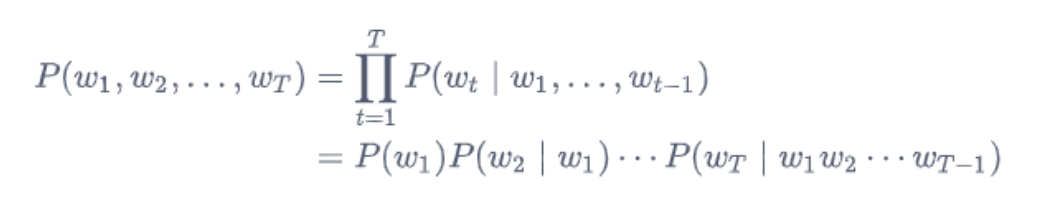



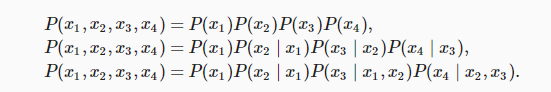

我是中国人
T=5, w1, w2, w3, w4, w5 
语言模型的目标就是评估该序列是否合理. 
怎么评估? 计算该序列的概率. 
P(w1, w2, w3, w4, w5) = P(我)P(是|我)P(中|我, 是)P(国|我, 是, 中)P(人|我, 是, 中, 国)
P(我是中国人) > P(我是中华人)

马尔科夫假设: 一个词的出现只与前面N个词相关, n阶马尔科夫链(Markov chain of order n)

你走先, 你先走 在一元语法中概率一样. 

n元语法的缺点:
    1. 参数空间过大
    2. 数据会比较稀疏

齐夫定律: 在一个自然语言语料库中, 某个单词出现的频率与其在频率表中名词的常数次幂成反比. 
    说人话: 极少数的单词会被经常使用到, 绝大多数单词很少被提及. 

In [45]:
# 使用上面写好的文本预处理代码, 实现n元语法. 
tokens = tokenize(read_time_machine())
# tokens是二维的, 每一行是一个列表.
tokens

[['the', 'time', 'machine', 'by', 'h', 'g', 'wells'],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 [],
 ['the',
  'time',
  'traveller',
  'for',
  'so',
  'it',
  'will',
  'be',
  'convenient',
  'to',
  'speak',
  'of',
  'him'],
 ['was',
  'expounding',
  'a',
  'recondite',
  'matter',
  'to',
  'us',
  'his',
  'grey',
  'eyes',
  'shone',
  'and'],
 ['twinkled',
  'and',
  'his',
  'usually',
  'pale',
  'face',
  'was',
  'flushed',
  'and',
  'animated',
  'the'],
 ['fire',
  'burned',
  'brightly',
  'and',
  'the',
  'soft',
  'radiance',
  'of',
  'the',
  'incandescent'],
 ['lights',
  'in',
  'the',
  'lilies',
  'of',
  'silver',
  'caught',
  'the',
  'bubbles',
  'that',
  'flashed',
  'and'],
 ['passed',
  'in',
  'our',
  'glasses',
  'our',
  'chairs',
  'being',
  'his',
  'patents',
  'embraced',
  'and'],
 ['caressed',
  'us',
  'rather',
  'than',
  'submitted',
  'to',
  'be',
  'sat',
  'upon',
  'and',
  'there',
  'was',
  'that'],
 ['luxurious',
  'after',
  'dinner',

In [52]:
corpus

['the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',


In [55]:
count_corpus(corpus)

Counter({'the': 2261,
         'time': 200,
         'machine': 85,
         'by': 103,
         'h': 1,
         'g': 1,
         'wells': 9,
         'i': 1267,
         'traveller': 61,
         'for': 221,
         'so': 112,
         'it': 437,
         'will': 37,
         'be': 93,
         'convenient': 5,
         'to': 695,
         'speak': 6,
         'of': 1155,
         'him': 40,
         'was': 552,
         'expounding': 2,
         'a': 816,
         'recondite': 1,
         'matter': 6,
         'us': 35,
         'his': 129,
         'grey': 11,
         'eyes': 35,
         'shone': 8,
         'and': 1245,
         'twinkled': 1,
         'usually': 3,
         'pale': 10,
         'face': 38,
         'flushed': 2,
         'animated': 3,
         'fire': 30,
         'burned': 6,
         'brightly': 4,
         'soft': 16,
         'radiance': 1,
         'incandescent': 1,
         'lights': 1,
         'in': 541,
         'lilies': 1,
         'silver': 6,
  

In [57]:
# 把所有文本行拼接在一起. 
corpus = [token for line in tokens for token in line]
# 词汇表
vocab = Vocab(corpus)

In [60]:
vocab.token_freqs

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440),
 ('it', 437),
 ('had', 354),
 ('me', 281),
 ('as', 270),
 ('at', 243),
 ('for', 221),
 ('with', 216),
 ('but', 204),
 ('time', 200),
 ('were', 158),
 ('this', 152),
 ('you', 137),
 ('on', 137),
 ('then', 134),
 ('his', 129),
 ('there', 127),
 ('he', 123),
 ('have', 122),
 ('they', 122),
 ('from', 122),
 ('one', 120),
 ('all', 118),
 ('not', 114),
 ('into', 114),
 ('upon', 113),
 ('little', 113),
 ('so', 112),
 ('is', 106),
 ('came', 105),
 ('by', 103),
 ('some', 94),
 ('be', 93),
 ('no', 92),
 ('could', 92),
 ('their', 91),
 ('said', 89),
 ('saw', 88),
 ('down', 87),
 ('them', 86),
 ('machine', 85),
 ('which', 85),
 ('very', 85),
 ('or', 84),
 ('an', 84),
 ('we', 82),
 ('now', 79),
 ('what', 77),
 ('been', 75),
 ('these', 74),
 ('like', 74),
 ('her', 74),
 ('out', 73),
 ('seemed', 72),
 ('up', 71),
 ('man', 70),
 ('about', 70),
 ('s', 70),
 

In [61]:
# 取出所有的词频
freqs = [freq for token, freq in vocab.token_freqs]
freqs

[2261,
 1267,
 1245,
 1155,
 816,
 695,
 552,
 541,
 443,
 440,
 437,
 354,
 281,
 270,
 243,
 221,
 216,
 204,
 200,
 158,
 152,
 137,
 137,
 134,
 129,
 127,
 123,
 122,
 122,
 122,
 120,
 118,
 114,
 114,
 113,
 113,
 112,
 106,
 105,
 103,
 94,
 93,
 92,
 92,
 91,
 89,
 88,
 87,
 86,
 85,
 85,
 85,
 84,
 84,
 82,
 79,
 77,
 75,
 74,
 74,
 74,
 73,
 72,
 71,
 70,
 70,
 70,
 69,
 66,
 62,
 61,
 60,
 59,
 59,
 57,
 57,
 57,
 55,
 54,
 54,
 53,
 52,
 51,
 50,
 49,
 49,
 49,
 49,
 49,
 49,
 48,
 48,
 47,
 47,
 46,
 46,
 46,
 46,
 45,
 45,
 44,
 43,
 43,
 43,
 42,
 42,
 41,
 40,
 40,
 40,
 40,
 39,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 34,
 34,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 32,
 32,
 31,
 31,
 31,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 26,
 26,
 26,
 26,
 26,
 25,
 25,
 25,
 25,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 22,
 

In [63]:
from d2l import torch as d2l

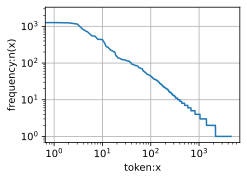

In [64]:
d2l.plot(freqs, xlabel='token:x', ylabel='frequency:n(x)', xscale='log', yscale='log')

In [65]:
# 二元语法 bi-grams
bigram_tokens = [pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_tokens

[('the', 'time'),
 ('time', 'machine'),
 ('machine', 'by'),
 ('by', 'h'),
 ('h', 'g'),
 ('g', 'wells'),
 ('wells', 'i'),
 ('i', 'the'),
 ('the', 'time'),
 ('time', 'traveller'),
 ('traveller', 'for'),
 ('for', 'so'),
 ('so', 'it'),
 ('it', 'will'),
 ('will', 'be'),
 ('be', 'convenient'),
 ('convenient', 'to'),
 ('to', 'speak'),
 ('speak', 'of'),
 ('of', 'him'),
 ('him', 'was'),
 ('was', 'expounding'),
 ('expounding', 'a'),
 ('a', 'recondite'),
 ('recondite', 'matter'),
 ('matter', 'to'),
 ('to', 'us'),
 ('us', 'his'),
 ('his', 'grey'),
 ('grey', 'eyes'),
 ('eyes', 'shone'),
 ('shone', 'and'),
 ('and', 'twinkled'),
 ('twinkled', 'and'),
 ('and', 'his'),
 ('his', 'usually'),
 ('usually', 'pale'),
 ('pale', 'face'),
 ('face', 'was'),
 ('was', 'flushed'),
 ('flushed', 'and'),
 ('and', 'animated'),
 ('animated', 'the'),
 ('the', 'fire'),
 ('fire', 'burned'),
 ('burned', 'brightly'),
 ('brightly', 'and'),
 ('and', 'the'),
 ('the', 'soft'),
 ('soft', 'radiance'),
 ('radiance', 'of'),
 ('of', 

In [67]:
bigram_vocab = Vocab(bigram_tokens)

In [69]:
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [70]:
# 三元法
trigra_tokens = [triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigra_tokens

[('the', 'time', 'machine'),
 ('time', 'machine', 'by'),
 ('machine', 'by', 'h'),
 ('by', 'h', 'g'),
 ('h', 'g', 'wells'),
 ('g', 'wells', 'i'),
 ('wells', 'i', 'the'),
 ('i', 'the', 'time'),
 ('the', 'time', 'traveller'),
 ('time', 'traveller', 'for'),
 ('traveller', 'for', 'so'),
 ('for', 'so', 'it'),
 ('so', 'it', 'will'),
 ('it', 'will', 'be'),
 ('will', 'be', 'convenient'),
 ('be', 'convenient', 'to'),
 ('convenient', 'to', 'speak'),
 ('to', 'speak', 'of'),
 ('speak', 'of', 'him'),
 ('of', 'him', 'was'),
 ('him', 'was', 'expounding'),
 ('was', 'expounding', 'a'),
 ('expounding', 'a', 'recondite'),
 ('a', 'recondite', 'matter'),
 ('recondite', 'matter', 'to'),
 ('matter', 'to', 'us'),
 ('to', 'us', 'his'),
 ('us', 'his', 'grey'),
 ('his', 'grey', 'eyes'),
 ('grey', 'eyes', 'shone'),
 ('eyes', 'shone', 'and'),
 ('shone', 'and', 'twinkled'),
 ('and', 'twinkled', 'and'),
 ('twinkled', 'and', 'his'),
 ('and', 'his', 'usually'),
 ('his', 'usually', 'pale'),
 ('usually', 'pale', 'face'),

In [72]:
trigram_vocab = Vocab(trigra_tokens)
trigram_vocab.token_freqs

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13),
 (('for', 'a', 'moment'), 12),
 (('said', 'the', 'time'), 12),
 (('out', 'of', 'the'), 12),
 (('i', 'could', 'see'), 12),
 (('a', 'kind', 'of'), 11),
 (('said', 'the', 'medical'), 11),
 (('one', 'of', 'the'), 11),
 (('i', 'saw', 'a'), 11),
 (('and', 'i', 'was'), 11),
 (('i', 'could', 'not'), 11),
 (('the', 'little', 'people'), 11),
 (('i', 'had', 'a'), 10),
 (('to', 'me', 'that'), 10),
 (('i', 'don', 't'), 10),
 (('the', 'white', 'sphinx'), 10),
 (('that', 'i', 'was'), 10),
 (('i', 'thought', 'of'), 9),
 (('i', 'did', 'so'), 9),
 (('that', 'i', 'had'), 9),
 (('i', 'had', 'seen'), 9),
 (('in', 'the', 'end'), 9),
 (('must', 'have', 'been'), 9),
 (('of', 'the', 'morlocks'), 9),
 ((

In [73]:
# 对比一元, 二元, 三元语法
bigram_freqs = [freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs = [freq for token, freq in trigram_vocab.token_freqs]

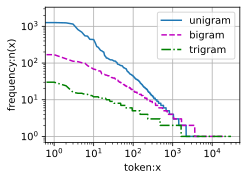

In [74]:
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token:x', 
        ylabel='frequency:n(x)', xscale='log', yscale='log',
        legend=['unigram', 'bigram', 'trigram'])

# 序列数据取样
- 随机采样
- 相邻采样

In [8]:
import numpy as np

In [9]:
corpus = np.arange(35)
num_steps = 5
num_subseqs = (len(corpus) - 1)// num_steps
num_subseqs

6

In [17]:
initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
initial_indices

[0, 5, 10, 15, 20, 25]

In [22]:
# random.shuffle修改了原始数据
random.shuffle(initial_indices)

In [23]:
initial_indices

[20, 0, 25, 10, 15, 5]

In [12]:
import random

In [28]:
import torch

In [30]:
# 随机采样
def seq_data_iter_random(corpus, batch_size, num_steps):
    # 搞个随机偏移量
    corpus = corpus[random.randint(0, num_steps - 1):]
    #  考虑标签, 所以-1
    num_subseqs = (len(corpus) - 1)// num_steps
    # 子序列的起始索引
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    # 为了随机的效果, 打乱initial_indices
    random.shuffle(initial_indices)
    
    def data(pos):
        return corpus[pos: pos + num_steps]
    
    num_batches = num_subseqs // batch_size
    
    for i in range(0, batch_size * num_batches, batch_size):
        initial_indices_per_batch = initial_indices[i: i + batch_size]
        # 取数据
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y)

In [32]:
my_seq = list(range(35))

for X, Y in seq_data_iter_random(my_seq, batch_size=2, num_steps=5):
    print('X:', X, '\nY:', Y)

X: tensor([[17, 18, 19, 20, 21],
        [27, 28, 29, 30, 31]]) 
Y: tensor([[18, 19, 20, 21, 22],
        [28, 29, 30, 31, 32]])
X: tensor([[12, 13, 14, 15, 16],
        [ 2,  3,  4,  5,  6]]) 
Y: tensor([[13, 14, 15, 16, 17],
        [ 3,  4,  5,  6,  7]])
X: tensor([[ 7,  8,  9, 10, 11],
        [22, 23, 24, 25, 26]]) 
Y: tensor([[ 8,  9, 10, 11, 12],
        [23, 24, 25, 26, 27]])


In [33]:
my_seq

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34]

In [38]:
batch_size=2
num_tokens = ((len(my_seq) - 1) // batch_size) * batch_size
num_tokens
Xs = torch.tensor(my_seq[: num_tokens])
Xs
Xs = Xs.reshape(batch_size, -1)              

In [39]:
Xs.shape

torch.Size([2, 17])

In [40]:
Xs

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]])

In [47]:
#  顺序采样
def seq_data_iter_sequential(corpus, batch_size, num_steps):
    # 加一个随机偏移量
    offset = random.randint(0, num_steps)
    # 有效token的长度
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size
    Xs = torch.tensor(corpus[offset: offset + num_tokens])
    Ys = torch.tensor(corpus[offset + 1: offset + num_tokens + 1])
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)
    num_batches = Xs.shape[1] // num_steps
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y

In [60]:
my_seq = list(range(35))

for X, Y in seq_data_iter_sequential(my_seq, batch_size=2, num_steps=5):
    print('X:', X, '\nY:', Y)

X: tensor([[ 4,  5,  6,  7,  8],
        [19, 20, 21, 22, 23]]) 
Y: tensor([[ 5,  6,  7,  8,  9],
        [20, 21, 22, 23, 24]])
X: tensor([[ 9, 10, 11, 12, 13],
        [24, 25, 26, 27, 28]]) 
Y: tensor([[10, 11, 12, 13, 14],
        [25, 26, 27, 28, 29]])
X: tensor([[14, 15, 16, 17, 18],
        [29, 30, 31, 32, 33]]) 
Y: tensor([[15, 16, 17, 18, 19],
        [30, 31, 32, 33, 34]])


In [67]:
# 把两个采样函数包装到类中, 方便后续使用. 
class SeqDataLoader:
    def __init__(self, batch_size, num_steps, use_random_iter, max_tokens):
        if use_random_iter:
            self.data_iter_fn = seq_data_iter_random
        else:
            self.data_iter_fn = seq_data_iter_sequential
        
        self.corpus, self.vocab = load_corpus_time_machine(max_tokens)
        self.batch_size, self.num_steps = batch_size, num_steps
        
    def __iter__(self):
        return self.data_iter_fn(self.corpus, self.batch_size, self.num_steps)

In [68]:
# 返回数据迭代器和词汇表
def load_data_time_machine(batch_size, num_steps, user_random_iter=False, max_tokens=10000):
    data_iter = SeqDataLoader(batch_size, num_steps, user_random_iter, max_tokens)
    return data_iter, data_iter.vocab

In [69]:
batch_size, num_steps = 2, 10
loader, vocab = load_data_time_machine(batch_size, num_steps=num_steps)

In [70]:
for i in loader:
    print(i)
    break

(tensor([[ 9,  2,  1,  3,  5, 13,  2,  1, 13,  4],
        [12, 14, 11,  2,  1, 17,  4,  8,  1,  4]]), tensor([[ 2,  1,  3,  5, 13,  2,  1, 13,  4, 15],
        [14, 11,  2,  1, 17,  4,  8,  1,  4, 12]]))


In [72]:
vocab.token_to_idx

{'<unk>': 0,
 ' ': 1,
 'e': 2,
 't': 3,
 'a': 4,
 'i': 5,
 'n': 6,
 'o': 7,
 's': 8,
 'h': 9,
 'r': 10,
 'd': 11,
 'l': 12,
 'm': 13,
 'u': 14,
 'c': 15,
 'f': 16,
 'w': 17,
 'g': 18,
 'y': 19,
 'p': 20,
 'b': 21,
 'v': 22,
 'k': 23,
 'x': 24,
 'z': 25,
 'j': 26,
 'q': 27}